1.. Find the census trck shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. 
Load it as a geopandas file

In [23]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
import geopandas as gd
%matplotlib inline

In [69]:
shape_path="PUIdata/nycb2010.shp"
ct_shape = gd.GeoDataFrame.from_file(shape_path)
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820313 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [70]:
from fiona.crs import from_epsg
ct_shape = ct_shape.to_crs(epsg=4326) #converting to LAT and LON
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((-74.07920577013249 40.643430783779, ..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,POLYGON ((-74.07061992438021 40.61085506708749...
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910647 40.62600632456045...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,POLYGON ((-74.08708799689831 40.61116883127258...
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511995 40.60100160658919...


2.. Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon 

In [71]:
ct_latlon = ct_shape[ct_shape['BoroName']=='Brooklyn']
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,"POLYGON ((-74.00659158337982 40.6556127336851,..."
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384570527...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((-73.99270830309769 40.6980992598468,..."
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,POLYGON ((-73.98514306089651 40.69488514300314...
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125493 40.69837793357372...


3.. Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP

    shapely.geometry.Point()

In [72]:
from shapely.geometry import Point
from shapely.geometry import asShape

In [82]:
CUSPpoint = Point(-73.986701,40.693222) 

In [83]:
list(CUSPpoint.coords)

[(-73.986701, 40.693222)]

4.. Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

In [84]:
n=len(ct_latlon)

In [113]:
i=0
for tract in ct_latlon.geometry:
    i+=1
    if asShape(tract).contains(CUSPpoint):
        print 'CUSP is contained in', tract
        index=i

CUSP is contained in POLYGON ((-73.98619262163142 40.69375351897136, -73.98621117787486 40.6933838601358, -73.98622595691906 40.69308831343839, -73.98725396415627 40.69312490276504, -73.98722751058244 40.69379951953569, -73.98619262163142 40.69375351897136))


In [115]:
index

9062

5.. Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot)
and overplot the locati`on of cusp as a point (using pylab.scatter)
Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

In [116]:
ct_latlon.iloc[[9062]]

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
35384,30011001010,3,Brooklyn,1010,001100,67055.537147,1037.825067,POLYGON ((-73.98519903380242 40.69371550178997...


In [104]:
ct_reduced = ct_latlon[(ct_latlon.index % 10) == 0]
ct_reduced.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,POLYGON ((-73.98514306089651 40.69488514300314...
5050,30041001000,3,Brooklyn,1000,004100,168913.739420,1851.387953,"POLYGON ((-73.98181677514268 40.6873298022958,..."
5060,30058001000,3,Brooklyn,1000,005800,204783.647393,2154.916118,"POLYGON ((-74.0302111304194 40.62014827319938,..."
5070,30071001000,3,Brooklyn,1000,007100,177135.559859,1878.338108,POLYGON ((-73.98395292782652 40.68418142923605...
5080,30101001000,3,Brooklyn,1000,010100,209170.511095,2123.491960,POLYGON ((-73.99516890132156 40.65966952207737...


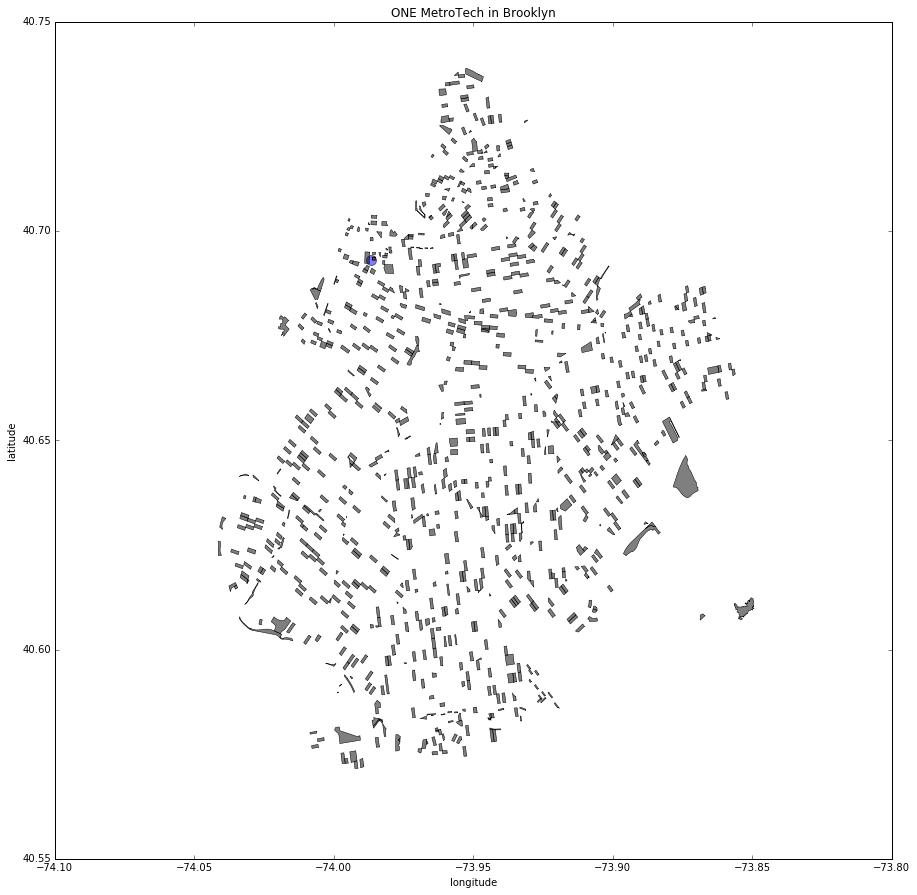

In [121]:
f, ax = plt.subplots(figsize=(15,15))
ct_reduced.plot(linewidth=0.5, color='k', ax=ax)
ct_latlon.iloc[[9062]].plot(linewidth=1, color='r', ax=ax, label='OneMetro Tech Census Block')
plt.scatter(-73.9866365,40.6931259, s=100, alpha=0.5, label='CUSP')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title("ONE MetroTech in Brooklyn")